#**Proyecto Integrador:**

Integrantes:

*   Andres Felipe Morales Martinez
*   Giovanny Gómez Convers 
*   Laura Margarita Guerrero Guerra
*   Sun Yin Huang Huang

Universidad EAFIT

2023-1

## 00. Conexión S3

In [ ]:
#instalar java y spark
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar xf spark-3.3.2-bin-hadoop3.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

# spark conectado con Amazon AWS:
# OJO, LOS KEY Y TOKEN SE VENCEN CADA VEZ QUE SE APAGA EL LEARNER LAB, ENTONCES TOCA INICIAR Y TOMAR LOS NUEVOS desde la cuenta de ggomezco@eafit.edu.co....
spark = SparkSession.builder \
    .appName("integrador2023LosEstocasticos")\
    .master("local[*]")\
    .config("spark.driver.memory","16G")\
    .config("spark.driver.maxResultSize", "0") \
    .config("spark.kryoserializer.buffer.max", "2000M")\
    .config("spark.jars.packages", "com.amazonaws:aws-java-sdk:1.11.1034,org.apache.hadoop:hadoop-aws:3.3.4")\
    .config('fs.s3a.access.key', "ADICIONAR KEY")\
    .config('fs.s3a.secret.key', "ADICIONAR SECRET")\
    .config('fs.s3a.session.token',"ADICIONAR TOKEN")\
    .config('fs.s3a.path.style.access', 'true') \
    .config('fs.s3a.impl', 'org.apache.hadoop.fs.s3a.S3AFileSystem') \
    .config('fs.s3a.endpoint', 's3.amazonaws.com') \
    .getOrCreate()

#create spark session object
sc = spark.sparkContext

In [ ]:
# conexión a tablas en zona silver para analisis e inicio de modelación
dfGenerales = spark.read.parquet('s3a://integrador-grupo2/Silver/tablas/Generales/')
dfOcupados  = spark.read.parquet('s3a://integrador-grupo2/Silver/tablas/Ocupados/')
dfESTUDIO   = spark.read.parquet('s3a://integrador-grupo2/Silver/tablas/DataSetUnificado/') #ESTE ES EL DATASET DE ESTUDIO

In [ ]:
dfGenerales.printSchema()

root
 |-- directorio: long (nullable = true)
 |-- secuencia_p: long (nullable = true)
 |-- orden: long (nullable = true)
 |-- mes: long (nullable = true)
 |-- p3271: long (nullable = true)
 |-- p6040: long (nullable = true)
 |-- p6050: long (nullable = true)
 |-- p6080: long (nullable = true)
 |-- p6090: long (nullable = true)
 |-- p6100: double (nullable = true)
 |-- p3042: double (nullable = true)
 |-- clase: long (nullable = true)
 |-- area: double (nullable = true)
 |-- periodo: long (nullable = true)
 |-- dpto: long (nullable = true)
 |-- fex_c18: double (nullable = true)
 |-- lgbt_numerica: double (nullable = true)
 |-- discapacidad: double (nullable = true)
 |-- dificultad: double (nullable = true)
 |-- campesina: long (nullable = true)



In [ ]:
dfOcupados.printSchema()

root
 |-- directorio: long (nullable = true)
 |-- secuencia_p: long (nullable = true)
 |-- orden: long (nullable = true)
 |-- mes: long (nullable = true)
 |-- p7020: long (nullable = true)
 |-- clase: long (nullable = true)
 |-- area: long (nullable = true)
 |-- periodo: long (nullable = true)
 |-- dpto: long (nullable = true)
 |-- fex_c18: double (nullable = true)
 |-- p9440: long (nullable = true)
 |-- p6920: long (nullable = true)
 |-- oci: long (nullable = true)
 |-- inglabo: long (nullable = true)
 |-- p6915: long (nullable = true)
 |-- p6426: long (nullable = true)
 |-- p7170s1: long (nullable = true)
 |-- p515: long (nullable = true)
 |-- p3363: long (nullable = true)



In [ ]:
dfGenerales.show(5)

+----------+-----------+-----+---+-----+-----+-----+-----+-----+-----+-----+-----+----+--------+----+------------+-------------+------------+----------+---------+
|directorio|secuencia_p|orden|mes|p3271|p6040|p6050|p6080|p6090|p6100|p3042|clase|area| periodo|dpto|     fex_c18|lgbt_numerica|discapacidad|dificultad|campesina|
+----------+-----------+-----+---+-----+-----+-----+-----+-----+-----+-----+-----+----+--------+----+------------+-------------+------------+----------+---------+
|   7053581|          1|    4|  4|    1|   13|   13|    6|    1|  3.0|  4.0|    1| 5.0|20220417|   5|919.53239935|         null|         0.0|       0.0|        0|
|   7053624|          1|    2|  4|    2|   32|    2|    6|    1|  1.0|  5.0|    1|null|20220417|   5|193.67415457|          0.0|         0.0|       0.0|        0|
|   7053701|          1|    1|  4|    2|   47|    1|    6|    1|  1.0|  9.0|    1|11.0|20220417|  11|3470.8507613|          0.0|         0.0|       0.0|        0|
|   7053708|          

In [ ]:
dfOcupados.show(5)

+----------+-----------+-----+---+-----+-----+----+--------+----+------------+-----+-----+---+--------+-----+-----+-------+----+-----+
|directorio|secuencia_p|orden|mes|p7020|clase|area| periodo|dpto|     fex_c18|p9440|p6920|oci| inglabo|p6915|p6426|p7170s1|p515|p3363|
+----------+-----------+-----+---+-----+-----+----+--------+----+------------+-----+-----+---+--------+-----+-----+-------+----+-----+
|   7273831|          1|    2| 11|    2|    1|  47|20221147|  47|265.10446827| null|    2|  1|  600000|    2|   12|      2|   1| null|
|   7273894|          1|    1| 11|    1|    1|  50|20221147|  50|211.60996615|    1|    1|  1|10000000|    1|  180|      1|   1|    5|
|   7273906|          1|    2| 11|    1|    1|  50|20221147|  50|196.67052514|    2|    2|  1|  800000|    1|   12|      1|   1|    1|
|   7274071|          1|    4| 11|    1|    1|  52|20221147|  52|91.125281954|    2|    1|  1| 2400000|    1|   12|      1|   1|    2|
|   7274138|          1|    2| 11|    2|    1|  52|2022

In [ ]:
dfESTUDIO.printSchema()

root
 |-- directorio_gen: long (nullable = true)
 |-- secuencia_p_gen: long (nullable = true)
 |-- orden_gen: long (nullable = true)
 |-- mes_gen: long (nullable = true)
 |-- clase_gen: long (nullable = true)
 |-- area_gen: double (nullable = true)
 |-- periodo_gen: long (nullable = true)
 |-- dpto_gen: long (nullable = true)
 |-- fex_c18_gen: double (nullable = true)
 |-- p3271_gen: long (nullable = true)
 |-- p6040_gen: long (nullable = true)
 |-- p6050_gen: long (nullable = true)
 |-- p6080_gen: long (nullable = true)
 |-- p6090_gen: long (nullable = true)
 |-- p6100_gen: double (nullable = true)
 |-- p3042_gen: double (nullable = true)
 |-- lgbt_numerica_gen: double (nullable = true)
 |-- discapacidad_gen: double (nullable = true)
 |-- dificultad_gen: double (nullable = true)
 |-- campesina_gen: long (nullable = true)
 |-- directorio_ocu: long (nullable = true)
 |-- secuencia_p_ocu: long (nullable = true)
 |-- orden_ocu: long (nullable = true)
 |-- mes_ocu: long (nullable = true)
 

In [ ]:
dfESTUDIO.show(5)

+--------------+---------------+---------+-------+---------+--------+-----------+--------+------------+---------+---------+---------+---------+---------+---------+---------+-----------------+----------------+--------------+-------------+--------------+---------------+---------+-------+---------+--------+-----------+--------+------------+---------+---------+---------+-------+-----------+---------+---------+-----------+--------+---------+
|directorio_gen|secuencia_p_gen|orden_gen|mes_gen|clase_gen|area_gen|periodo_gen|dpto_gen| fex_c18_gen|p3271_gen|p6040_gen|p6050_gen|p6080_gen|p6090_gen|p6100_gen|p3042_gen|lgbt_numerica_gen|discapacidad_gen|dificultad_gen|campesina_gen|directorio_ocu|secuencia_p_ocu|orden_ocu|mes_ocu|clase_ocu|area_ocu|periodo_ocu|dpto_ocu| fex_c18_ocu|p7020_ocu|p9440_ocu|p6920_ocu|oci_ocu|inglabo_ocu|p6915_ocu|p6426_ocu|p7170s1_ocu|p515_ocu|p3363_ocu|
+--------------+---------------+---------+-------+---------+--------+-----------+--------+------------+---------+-----

## 01. Librerias

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 02. Carga desde S3 y selección de variables

### 02.0. Cargue

In [ ]:
# llevar dataframe a pandas para tratamiento en filtros y modelación
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
geih_oci_2022 = dfESTUDIO.toPandas()

In [ ]:
geih_oci_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919459 entries, 0 to 919458
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   directorio_gen     919459 non-null  int64  
 1   secuencia_p_gen    919459 non-null  int64  
 2   orden_gen          919459 non-null  int64  
 3   mes_gen            919459 non-null  int64  
 4   clase_gen          919459 non-null  int64  
 5   area_gen           627349 non-null  float64
 6   periodo_gen        919459 non-null  int64  
 7   dpto_gen           919459 non-null  int64  
 8   fex_c18_gen        919459 non-null  float64
 9   p3271_gen          919459 non-null  int64  
 10  p6040_gen          919459 non-null  int64  
 11  p6050_gen          919459 non-null  int64  
 12  p6080_gen          919459 non-null  int64  
 13  p6090_gen          919459 non-null  int64  
 14  p6100_gen          865589 non-null  float64
 15  p3042_gen          885815 non-null  float64
 16  lg

In [ ]:
# EN ESTA CELDA SELECCIONAMOS LAS VARIABLES DEL DATASET dfESTUDIO

variables = ['directorio_gen','secuencia_p_gen','orden_gen','mes_gen','p3271_gen','p6040_gen', 'p6050_gen','p6080_gen','p6090_gen','p7020_ocu',
             'p6100_gen','p3042_gen','clase_gen','dpto_gen','fex_c18_gen','p9440_ocu','p6920_ocu','oci_ocu','inglabo_ocu','p6915_ocu',
             'p6426_ocu','p7170s1_ocu','p515_ocu','p3363_ocu','lgbt_numerica_gen','discapacidad_gen','dificultad_gen','campesina_gen']

# Variables relevantes
# ==============================================================================
# variables = ['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'MES', 'P3271', 'P6040', 'P6050', 'P6080', 'P6090', 'P7020', 
#             'P6100', 'P3042', 'CLASE', 'DPTO', 'FEX_C18', 'P9440', 'P6920', 'OCI', 'INGLABO','P6915', 
#             'P6426', 'P7170S1', 'P515', 'P3363', 'LGBT_Numerica', 'Discapacidad', 'Dificultad', 'Campesina'] 

In [ ]:
muestra = geih_oci_2022[variables]

In [ ]:
# Ordenar el dataframe 
# ==============================================================================
muestra = muestra.sort_values(by=['directorio_gen', 'secuencia_p_gen'])

In [ ]:
muestra.head(5)

,directorio_gen,secuencia_p_gen,orden_gen,mes_gen,p3271_gen,p6040_gen,p6050_gen,p6080_gen,p6090_gen,p7020_ocu,...,inglabo_ocu,p6915_ocu,p6426_ocu,p7170s1_ocu,p515_ocu,p3363_ocu,lgbt_numerica_gen,discapacidad_gen,dificultad_gen,campesina_gen
88308,5000000,1,3,1,2,11,3,6,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0
478476,5000000,1,2,1,2,31,2,6,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1
567377,5000000,1,5,1,1,3,3,6,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
579609,5000000,1,1,1,1,33,1,6,2,1.0,...,768000.0,4.0,36.0,2.0,1.0,1.0,0.0,0.0,0.0,0
627564,5000000,1,6,1,2,76,4,6,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0


In [ ]:
muestra.shape

(919459, 28)

### 02.1. Filtros 

#### Hogares que se componen por un padre/madre e hijo

In [ ]:
muestra.groupby('p6050_gen')[['directorio_gen']].count()

,directorio_gen
p6050_gen,
1,304459
2,153268
3,321465
4,14735
5,4320
6,17483
7,10748
8,56757
9,23684


In [ ]:
# Información de al menos un hijo
muestra['aux_hijo'] = (muestra['p6050_gen'] == 3).astype(int)

In [ ]:
# Agrupar la variable auxiliar para todo el hogar
muestra['hijo'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_hijo'].transform('max')

In [ ]:
muestra.groupby('hijo')[['directorio_gen']].count()

,directorio_gen
hijo,
0,203201
1,716258


In [ ]:
# Borrar la información de hogares que no tienen hijos
muestra = muestra[muestra['hijo'] == 1]
#muestra

#### Hijo ocupado

In [ ]:
muestra.groupby(['oci_ocu','p6050_gen'])[['directorio_gen']].count()

directorio_gen
oci_ocu p6050_gen                
1.0     1                  126326
        2                   57918
        3                   71614
        4                    1260
        5                     530
        6                    3659
        7                    6342
        8                    3067
        9                    3487
        10                    957
        11                     58
        12                     52
        13                   2016

In [ ]:
# Hijo ocupado
#muestra[(muestra['P6050'] == 3) & (muestra['OCI'] == 1)]
muestra['aux_oci'] = np.where((muestra['p6050_gen'] == 3) & (muestra['oci_ocu'] == 1), 1, 0)

In [ ]:
# Agrupar la variable auxiliar para todo el hogar
muestra['hijo_oci'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_oci'].transform('max')

In [ ]:
muestra.groupby('hijo_oci')[['directorio_gen']].count()

,directorio_gen
hijo_oci,
0,475033
1,241225


In [ ]:
# Borrar la información de hogares que no tienen hijos
muestra = muestra[muestra['hijo_oci'] == 1]
#muestra

#### Primer trabajo del hijo

In [ ]:
# Antes del actual trabajo, ¿...Tuvo otro trabajo? 1. Si, 2. No
muestra.groupby(['p7020_ocu','p6050_gen'])[['directorio_gen']].count()

directorio_gen
p7020_ocu p6050_gen                
1.0       1                   20951
          2                    7914
          3                   40099
          4                      89
          5                      40
          6                     547
          7                    2995
          8                    1051
          9                     710
          10                    121
          11                     17
          12                     15
          13                    470
2.0       1                   10090
          2                    4848
          3                   31515
          4                      47
          5                      12
          6                     283
          7                    1563
          8                    1198
          9                     469
          10                     67
          11                     11
          13                    234

In [ ]:
# Hijo ocupado con su primer trabajo
#muestra[(muestra['P6050'] == 3) & (muestra['P7020'] == 2)]
muestra['aux_primer'] = np.where((muestra['p6050_gen'] == 3) & (muestra['p7020_ocu'] == 2), 1, 0)

In [ ]:
# Agrupar la variable auxiliar para todo el hogar
muestra['primer'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_primer'].transform('max')

In [ ]:
muestra.groupby('primer')[['directorio_gen']].count()

,directorio_gen
primer,
0,120716
1,120509


In [ ]:
# Borrar la información de hogares que no tienen hijos
muestra = muestra[muestra['primer'] == 1]
#muestra

In [ ]:
# Cantidad de hogares únicos
len(np.unique(muestra[['directorio_gen','secuencia_p_gen']]))

27817

### 02.2. Variables


#### Sexo (1: Mujer, 0: Hombre)

In [ ]:
# Padre
# ==============================================================================
muestra.loc[muestra['p6050_gen'] == 1, 'p3271_gen'].value_counts().sort_index()

1    12087
2    15745
Name: p3271_gen, dtype: int64

In [ ]:
# Categorias
muestra['aux_jefe_hom'] = np.where((muestra['p3271_gen'] == 1) & (muestra['p6050_gen'] == 1), 1, 0)
muestra['aux_jefe_muj'] = np.where((muestra['p3271_gen'] == 2) & (muestra['p6050_gen'] == 1), 1, 0)

In [ ]:
muestra.value_counts(['aux_jefe_hom', 'aux_jefe_muj']).sort_index()

aux_jefe_hom  aux_jefe_muj
0             0               92677
              1               15745
1             0               12087
dtype: int64

In [ ]:
# Para toda la muestra 
muestra['jefe_hombre'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_hom'].transform('max')
muestra['jefe_mujer']  = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_muj'].transform('max')

In [ ]:
# Hijo
# ==============================================================================
muestra.loc[muestra['p6050_gen'] == 3, 'p3271_gen'].value_counts().sort_index()

1    30632
2    24083
Name: p3271_gen, dtype: int64

In [ ]:
# Categorias
muestra['hijo_hombre'] = np.where((muestra['p3271_gen'] == 1) & (muestra['p6050_gen'] == 3), 1, 0)
muestra['hijo_mujer']  = np.where((muestra['p3271_gen'] == 2) & (muestra['p6050_gen'] == 3), 1, 0)

In [ ]:
muestra.value_counts(['hijo_hombre', 'hijo_mujer']).sort_index()

hijo_hombre  hijo_mujer
0            0             65794
             1             24083
1            0             30632
dtype: int64

#### Edad

In [ ]:
# Padre
# ==============================================================================
muestra['aux_edad_jefe'] = np.where(muestra['p6050_gen'] == 1, muestra['p6040_gen'], None)

In [ ]:
# Para toda la muestra
muestra['edad_jefe'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_edad_jefe'].transform('max')

In [ ]:
# Hijo
# ==============================================================================
muestra['edad_hijo'] = np.where(muestra['p6050_gen'] == 3, muestra['p6040_gen'], None)

In [ ]:
# Variable de juventud
muestra['hijo_joven'] = np.where(muestra['edad_hijo'] <= 26, 1, 0)

#### Educación

In [ ]:
# Padre
# ==============================================================================
muestra.loc[muestra['p6050_gen'] == 1, 'p3042_gen'].value_counts().sort_index()

1.0      1963
2.0         8
3.0     10569
4.0      3834
5.0      6645
6.0       342
7.0        55
8.0      1388
9.0       513
10.0     1867
11.0      495
12.0      131
13.0       22
Name: p3042_gen, dtype: int64

In [ ]:
# Categorias
muestra['aux_jefe_ninguno']    = np.where( (muestra['p3042_gen'] == 1)                                                         & (muestra['p6050_gen'] == 1), 1, 0)
muestra['aux_jefe_primaria']   = np.where(((muestra['p3042_gen'] == 2)  | (muestra['p3042_gen'] == 3))                             & (muestra['p6050_gen'] == 1), 1, 0)
muestra['aux_jefe_secundaria'] = np.where( (muestra['p3042_gen'] == 4)                                                         & (muestra['p6050_gen'] == 1), 1, 0)
muestra['aux_jefe_media']      = np.where(((muestra['p3042_gen'] == 5)  | (muestra['p3042_gen'] == 6)  | (muestra['p3042_gen'] == 7))  & (muestra['p6050_gen'] == 1), 1, 0)
muestra['aux_jefe_tecnica']    = np.where(((muestra['p3042_gen'] == 8)  | (muestra['p3042_gen'] == 9))                             & (muestra['p6050_gen'] == 1), 1, 0)
muestra['aux_jefe_pregrado']   = np.where( (muestra['p3042_gen'] == 10)                                                        & (muestra['p6050_gen'] == 1), 1, 0)
muestra['aux_jefe_posgrado']   = np.where(((muestra['p3042_gen'] == 11) | (muestra['p3042_gen'] == 12) | (muestra['p3042_gen'] == 13)) & (muestra['p6050_gen'] == 1), 1, 0)

In [ ]:
# Para toda la muestra
muestra['jefe_ninguno']    = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_ninguno'].transform('max')
muestra['jefe_primaria']   = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_primaria'].transform('max')
muestra['jefe_secundaria'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_secundaria'].transform('max')
muestra['jefe_media']      = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_media'].transform('max')
muestra['jefe_tecnica']    = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_tecnica'].transform('max')
muestra['jefe_pregrado']   = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_pregrado'].transform('max')
muestra['jefe_posgrado']   = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_posgrado'].transform('max')

In [ ]:
# Hijo
# ==============================================================================
muestra.loc[muestra['p6050_gen'] == 3, 'p3042_gen'].value_counts().sort_index()

1.0      1278
2.0       417
3.0      6724
4.0      9983
5.0     17069
6.0      1357
7.0        90
8.0      4454
9.0      1899
10.0    10160
11.0      646
12.0      282
13.0       17
Name: p3042_gen, dtype: int64

In [ ]:
# Categorias
muestra['hijo_ninguno']    = np.where( (muestra['p3042_gen'] == 1)                                                         & (muestra['p6050_gen'] == 3), 1, 0)
muestra['hijo_primaria']   = np.where(((muestra['p3042_gen'] == 2)  | (muestra['p3042_gen'] == 3))                             & (muestra['p6050_gen'] == 3), 1, 0)
muestra['hijo_secundaria'] = np.where( (muestra['p3042_gen'] == 4)                                                         & (muestra['p6050_gen'] == 3), 1, 0)
muestra['hijo_media']      = np.where(((muestra['p3042_gen'] == 5)  | (muestra['p3042_gen'] == 6)  | (muestra['p3042_gen'] == 7))  & (muestra['p6050_gen'] == 3), 1, 0)
muestra['hijo_tecnica']    = np.where(((muestra['p3042_gen'] == 8)  | (muestra['p3042_gen'] == 9))                             & (muestra['p6050_gen'] == 3), 1, 0)
muestra['hijo_pregrado']   = np.where( (muestra['p3042_gen'] == 10)                                                        & (muestra['p6050_gen'] == 3), 1, 0)
muestra['hijo_posgrado']   = np.where(((muestra['p3042_gen'] == 11) | (muestra['p3042_gen'] == 12) | (muestra['p3042_gen'] == 13)) & (muestra['p6050_gen'] == 3), 1, 0)

#### Raza

In [ ]:
# Padre
# ==============================================================================
muestra.loc[muestra['p6050_gen'] == 1, 'p6080_gen'].value_counts().sort_index()

1     1128
2        3
3       85
4       25
5     2367
6    24224
Name: p6080_gen, dtype: int64

In [ ]:
# Categoria
muestra['aux_jefe_raza'] = np.where((muestra['p6080_gen'] != 6) & (muestra['p6050_gen'] == 1), 1, 0)

In [ ]:
muestra['aux_jefe_raza'].value_counts()

0    116901
1      3608
Name: aux_jefe_raza, dtype: int64

In [ ]:
# Para toda la muestra
muestra['jefe_raza'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_raza'].transform('max')

In [ ]:
# Hijo
# ==============================================================================
muestra.loc[muestra['p6050_gen'] == 3, 'p6080_gen'].value_counts().sort_index()

1     2313
2        5
3      166
4       32
5     4495
6    47704
Name: p6080_gen, dtype: int64

In [ ]:
# Categoria
muestra['hijo_raza'] = np.where((muestra['p6080_gen'] != 6) & (muestra['p6050_gen'] == 3), 1, 0)

In [ ]:
muestra['hijo_raza'].value_counts()

0    113498
1      7011
Name: hijo_raza, dtype: int64

#### Formal e informal (1: Formal, 0: Informal)

In [ ]:
# Creando variables de seguridad social
# ==============================================================================
muestra['salud']   = np.where((muestra['p6090_gen']==1) & ((muestra['p6100_gen']==1) | (muestra['p6100_gen']==2)) & (muestra['p6915_ocu']==1), 1, None)
muestra['pension'] = np.where(muestra['p6920_ocu']==1, 1, None)

In [ ]:
# Variable de formalidad
# ==============================================================================
muestra['formal']  = np.where((muestra['salud']==1) & (muestra['pension']==1), 1, None)

In [ ]:
# Padre
# =============================================================================
muestra.loc[muestra['p6050_gen'] == 1, 'formal'].value_counts().sort_index()

1    4719
Name: formal, dtype: int64

In [ ]:
# Categorias
muestra['aux_jefe_formal']   = np.where((muestra['formal'] == 1) & (muestra['p6050_gen'] == 1), 1, 0)
muestra['aux_jefe_informal'] = np.where((muestra['formal'] != 1) & (muestra['p6050_gen'] == 1), 1, 0)

In [ ]:
muestra[['aux_jefe_formal', 'aux_jefe_informal']].value_counts()

aux_jefe_formal  aux_jefe_informal
0                0                    92677
                 1                    23113
1                0                     4719
dtype: int64

In [ ]:
# Para toda la muestra
muestra['jefe_formal']   = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_formal'].transform('max')
muestra['jefe_informal'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_jefe_informal'].transform('max')

In [ ]:
# Hijo
# =============================================================================
muestra.loc[muestra['p6050_gen'] == 3, 'formal'].value_counts().sort_index()

1    12904
Name: formal, dtype: int64

In [ ]:
# Categoria
muestra['hijo_formal'] = np.where((muestra['formal'] == 1) & (muestra['p6050_gen'] == 3), 1, 0)

In [ ]:
muestra[['hijo_formal']].value_counts()

hijo_formal
0              107605
1               12904
dtype: int64

#### Del hogar

##### Zona

In [ ]:
# Zona (1: urbano, 2: rural)
# ==============================================================================
muestra.groupby('clase_gen')[['directorio_gen']].count()

,directorio_gen
clase_gen,
1,104362
2,16147


In [ ]:
# Categorias
muestra['aux_urbana'] = np.where(muestra['clase_gen'] == 1, 1, 0)
muestra['aux_rural']  = np.where(muestra['clase_gen'] == 2, 1, 0)

In [ ]:
muestra[['aux_urbana', 'aux_rural']].value_counts()

aux_urbana  aux_rural
1           0            104362
0           1             16147
dtype: int64

In [ ]:
# Para toda la muestra
muestra['urbana'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_urbana'].transform('max')
muestra['rural']  = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_rural'].transform('max')

##### Miembros del hogar

In [ ]:
muestra['prueba'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['directorio_gen'].transform('count')

In [ ]:
muestra.loc[muestra['p6050_gen'] <= 5, 'prueba2'] = muestra[muestra['p6050_gen'] <= 5].groupby(['directorio_gen', 'secuencia_p_gen'])['directorio_gen'].transform('count')

In [ ]:
# Para toda la muestra
muestra['miembros'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['prueba2'].transform('max').astype(int)

In [ ]:
#muestra[['DIRECTORIO', 'P6050', 'prueba', 'prueba2', 'miembros']].head(30)

##### Logaritmo del ingreso per capita de los padres

In [ ]:
muestra.loc[muestra['p6050_gen'] <= 2, 'aux'] = muestra[muestra['p6050_gen'] <= 2].groupby(['directorio_gen', 'secuencia_p_gen'])['inglabo_ocu'].transform('sum')

In [ ]:
# Para toda la muestra
muestra['ing_padres'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux'].transform('max')

In [ ]:
# Logaritmo
muestra['Ling_padres'] = np.where(muestra['ing_padres'] != 0, np.log(muestra['ing_padres']), 0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#muestra[['DIRECTORIO', 'P6050', 'INGLABO', 'aux', 'ing_padres', 'Ling_padres']].head(30)

##### Composición del hogar

In [ ]:
# ¿Jefe y pareja existe?
muestra['jefe'] = np.where(muestra['p6050_gen'] == 1, 1, 0)
muestra['jefe_existe'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['jefe'].transform('max')

muestra['pareja'] = np.where(muestra['p6050_gen'] == 2, 1, 0)
muestra['pareja_existe'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['pareja'].transform('max')

In [ ]:
# Hogar nuclear
muestra['hogar_nuclear'] = np.where((muestra['jefe_existe'] == 1) & (muestra['pareja_existe'] == 1), 1, 0)

In [ ]:
# Hogar monoparental padre
muestra['hogar_padre'] = np.where((muestra['jefe_existe'] == 1) & (muestra['pareja_existe'] == 0) & (muestra['jefe_hombre'] == 1), 1, 0)

In [ ]:
# Hogar monoparental madre
muestra['hogar_madre'] = np.where((muestra['jefe_existe'] == 1) & (muestra['pareja_existe'] == 0) & (muestra['jefe_mujer'] == 1), 1, 0)

In [ ]:
muestra['prueba'] = muestra['hogar_nuclear'] + muestra['hogar_padre'] + muestra['hogar_madre']

In [ ]:
muestra['prueba'].value_counts()

1    120509
Name: prueba, dtype: int64

In [ ]:
#muestra[['DIRECTORIO', 'P6050', 'P3271', 'pareja_existe', 'jefe_hombre', 'jefe_mujer', 'hogar_nuclear', 'hogar_padre', 'hogar_madre']].head(30)

#### Otras variables (Internet y Departamento)

In [ ]:
# ¿Su empleo actual lo obtuvo a través de páginas de internet?
# ==============================================================================
muestra['internet'] = np.where(muestra['p9440_ocu'] == 1, 1, 0)

In [ ]:
# ¿Por qué medio principal, ... consiguió su empleo actual?
# ==============================================================================
muestra['ayuda'] = np.where(muestra['p3363_ocu'] == 1, 1, 0)

In [ ]:
# Comunidad LGBT
# ==============================================================================
muestra['lgbt'] = np.where(muestra['lgbt_numerica_gen'] == 1, 1, 0)

In [ ]:
# Discapacidad
# ==============================================================================
muestra['discapacidad'] = np.where(muestra['discapacidad_gen'] == 1, 1, 0)

In [ ]:
# Dificultad
# ==============================================================================
muestra['dificultad'] = np.where(muestra['dificultad_gen'] == 1, 1, 0)

In [ ]:
# Campesino
# ==============================================================================
muestra['campesino'] = np.where(muestra['campesina_gen'] == 1, 1, 0)

In [ ]:
# Departamento
# ==============================================================================
muestra['dpto_gen'].value_counts().sort_index()

5     6614
8     7259
11    3211
13    8009
15    4406
17    4403
18    2594
19    4451
20    5052
23    3805
25    2006
27    3655
41    4921
44    4220
47    6367
50    3229
52    5162
54    5321
63    3712
66    5166
68    5495
70    7206
73    3538
76    3747
81     522
85     515
86     522
88    2065
91    1137
94     510
95     304
97    1099
99     286
Name: dpto_gen, dtype: int64

In [ ]:
# Categorias
muestra['antioquia']    = np.where(muestra['dpto_gen'] == 5 , 1, 0)
muestra['atlantico']    = np.where(muestra['dpto_gen'] == 8 , 1, 0)
muestra['bogota']       = np.where(muestra['dpto_gen'] == 11, 1, 0)
muestra['bolivar']      = np.where(muestra['dpto_gen'] == 13, 1, 0)
muestra['boyaca']       = np.where(muestra['dpto_gen'] == 15, 1, 0)
muestra['caldas']       = np.where(muestra['dpto_gen'] == 17, 1, 0)
muestra['caqueta']      = np.where(muestra['dpto_gen'] == 18, 1, 0)
muestra['cauca']        = np.where(muestra['dpto_gen'] == 19, 1, 0)
muestra['cesar']        = np.where(muestra['dpto_gen'] == 20, 1, 0)
muestra['cordoba']      = np.where(muestra['dpto_gen'] == 23, 1, 0)
muestra['cundinamarca'] = np.where(muestra['dpto_gen'] == 25, 1, 0)
muestra['choco']        = np.where(muestra['dpto_gen'] == 27, 1, 0)
muestra['huila']        = np.where(muestra['dpto_gen'] == 41, 1, 0)
muestra['guajira']      = np.where(muestra['dpto_gen'] == 44, 1, 0)
muestra['magdalena']    = np.where(muestra['dpto_gen'] == 47, 1, 0)
muestra['meta']         = np.where(muestra['dpto_gen'] == 50, 1, 0)
muestra['narino']       = np.where(muestra['dpto_gen'] == 52, 1, 0)
muestra['norte']        = np.where(muestra['dpto_gen'] == 54, 1, 0)
muestra['quindio']      = np.where(muestra['dpto_gen'] == 63, 1, 0)
muestra['risaralda']    = np.where(muestra['dpto_gen'] == 66, 1, 0)
muestra['santander']    = np.where(muestra['dpto_gen'] == 68, 1, 0)
muestra['sucre']        = np.where(muestra['dpto_gen'] == 70, 1, 0)
muestra['tolima']       = np.where(muestra['dpto_gen'] == 73, 1, 0)
muestra['valle']        = np.where(muestra['dpto_gen'] == 76, 1, 0)
muestra['otros']        = np.where(muestra['dpto_gen'] >  76, 1, 0)

In [ ]:
#muestra['otros'].value_counts()

### 02.3. Individuo

#### Hijos

In [ ]:
muestra['p6050_gen'].value_counts()

3     54715
1     27832
8     14777
2     14527
7      3584
9      1997
4       965
13      836
6       798
5       378
10       83
11       13
12        4
Name: p6050_gen, dtype: int64

In [ ]:
# Quedandonos solo con información de los hijos
muestra = muestra[muestra['p6050_gen'] == 3]

#### Hijos ocupados

In [ ]:
muestra['oci_ocu'].value_counts()

1.0    36143
Name: oci_ocu, dtype: int64

In [ ]:
# Quedandonos solo con información de los hijos ocupados
muestra = muestra[muestra['oci_ocu'] == 1]

#### Hijos ocupados con el primer trabajo

In [ ]:
muestra['p7020_ocu'].value_counts()

2.0    31515
1.0     4628
Name: p7020_ocu, dtype: int64

In [ ]:
# Quedandonos solo con la información del hijo ocupado que tiene el primer trabajo
muestra = muestra[muestra['p7020_ocu'] == 2]

#### Hijos ocupados con el primer trabajo y mayor edad

In [ ]:
# Todavia tenemos hijos del mismo hogar, el objetivo es quedarnos con solo uno para aislar unicamente la conexión de sus padres
# Proxy del primer hijo que entró al mercado laboral
muestra.shape[0]

31515

In [ ]:
# La muestra debe quedar con este tamaño
muestra['directorio_gen'].nunique()

27812

In [ ]:
# Procedemos a quedarnos con el hijo de mayor edad 
muestra['hijo_mayor'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['p6040_gen'].transform('max')

In [ ]:
#muestra[['DIRECTORIO', 'P6050', 'P6040', 'hijo_mayor']].head(30)

In [ ]:
# Eliminado demás hijos
muestra = muestra[muestra['p6040_gen'] == muestra['hijo_mayor']]

#### Hijos ocupados con el primer trabajo, mayor edad y mayor tiempo trabajando

In [ ]:
# Seguimos con duplicados
muestra['aux_dup'] = muestra.duplicated('directorio_gen')

<ipython-input-231-379a0c214030>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra['aux_dup'] = muestra.duplicated('directorio_gen')


In [ ]:
muestra.groupby('aux_dup')['directorio_gen'].count()

aux_dup
False    27812
True        98
Name: directorio_gen, dtype: int64

In [ ]:
muestra['dup'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_dup'].transform('max')

<ipython-input-233-9c0e26297be6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra['dup'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['aux_dup'].transform('max')


In [ ]:
# Dado que son hijos ocupados con el primer trabajo y misma edad, nos quedamos con aquellos que tengan mas tiempo en el trabajo
muestra['hijo_tiempo'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['p6426_ocu'].transform('max')

<ipython-input-234-af2435e169db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra['hijo_tiempo'] = muestra.groupby(['directorio_gen', 'secuencia_p_gen'])['p6426_ocu'].transform('max')


In [ ]:
#muestra.loc[muestra['dup'] == 1, ['DIRECTORIO', 'P6050', 'P6040', 'P6426', 'hijo_mayor', 'hijo_tiempo']].head(30)

In [ ]:
# Eliminando los demas
muestra = muestra[muestra['p6426_ocu'] == muestra['hijo_tiempo']]

#### Aleatorio

In [ ]:
# Seguimos con duplicados
muestra['dup2'] = muestra.duplicated('directorio_gen')

In [ ]:
muestra.groupby('dup2')['directorio_gen'].count()

dup2
False    27812
True        50
Name: directorio_gen, dtype: int64

In [ ]:
# A estos duplicados revisamos si existe otra variable que nos permita seleccionar entre ellos. Se prueba con INGLABO
muestra.loc[muestra['dup2']==1, ['directorio_gen', 'inglabo_ocu']].head(5)

,directorio_gen,inglabo_ocu
460446,5000058,NaN
525661,5022077,0.0
343677,5024411,NaN
318419,5027767,240000.0
77356,5030066,900000.0


In [ ]:
# No obstante, aunque existen observaciones con diferEntes valores, suele ser más la excepción
muestra.loc[muestra['directorio_gen']==5027767, ['directorio_gen', 'inglabo_ocu']]

,directorio_gen,inglabo_ocu
80537,5027767,800000.0
318419,5027767,240000.0


In [ ]:
# Por lo que se decide eliminar de manera aleatoria (Representa unicamente el 0,09% de la muestra)
muestra = muestra[muestra['dup2']==0]
muestra.head(5)

,directorio_gen,secuencia_p_gen,orden_gen,mes_gen,p3271_gen,p6040_gen,p6050_gen,p6080_gen,p6090_gen,p7020_ocu,...,santander,sucre,tolima,valle,otros,hijo_mayor,aux_dup,dup,hijo_tiempo,dup2
527667,5000015,1,4,1,1,22,3,6,1,2.0,...,0,0,0,0,0,22,False,False,9.0,False
393481,5000031,1,3,1,1,17,3,6,1,2.0,...,0,0,0,0,0,17,False,False,24.0,False
316288,5000032,1,2,1,2,30,3,6,1,2.0,...,0,0,0,0,0,30,False,False,30.0,False
305626,5000035,1,3,1,1,28,3,6,1,2.0,...,0,0,0,0,0,28,False,False,144.0,False
558048,5000044,1,3,1,1,33,3,6,1,2.0,...,0,0,0,0,0,33,False,False,60.0,False


### 02.4. Almacenar en zona Silver selección de muestra con datos filtrados

In [ ]:
muestra.shape

(27812, 129)

In [ ]:
# Llevar pandas a DataFrame para almacenar datos en S3
df_spMuestra = spark.createDataFrame(muestra)

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


In [ ]:
from pyspark.sql.functions import col

# Se observa que algunos registros tienen datos nulos y al almacenarlos el tipo de archivo CSV o PARQUET no lo soporta, por lo tanto,
# se deben identificar cuales columnas tienen valores nulos
columnas_con_nulos = [columna for columna in df_spMuestra.columns if df_spMuestra.filter(col(columna).isNull()).count() > 0]
print(columnas_con_nulos)

['p6100_gen', 'p9440_ocu', 'inglabo_ocu', 'p3363_ocu', 'lgbt_numerica_gen', 'aux_edad_jefe', 'salud', 'pension', 'formal', 'aux']


In [ ]:
from pyspark.sql.functions import isnan, when, col
from pyspark.sql.types import IntegerType

# Generar una columna booleana para cada columna que indica si es nula o vacía
columnas = df_spMuestra.columns
condiciones = [col(columna).isNull() | (col(columna) == "") for columna in columnas]
condicion_general = condiciones[0]

for condicion in condiciones[1:]:
    condicion_general = condicion_general | condicion

# Agregar una columna adicional llamada "fila_vacia" que indica si alguna columna es nula o vacía
df_con_filas_vacias = df_spMuestra.withColumn("fila_vacia", condicion_general)

# Crear una nueva columna por cada columna original que reemplace el valor vacío o nulo con 0
columnas_con_0 = [when(col(columna).isNull() | (col(columna) == ""), 0)
                  .otherwise(col(columna).cast(IntegerType())).alias(columna) for columna in columnas]

# Aplicar las columnas con el valor 0 al DataFrame
df_con_valores_cambiadosMuestra = df_con_filas_vacias.select(columnas_con_0)

# Almacenar datos de muestra filtrada en S3
df_con_valores_cambiadosMuestra.write.mode("overwrite").csv("s3a://integrador-grupo2/Silver/MuestraAnalisis/muestra.csv")


## 03. Análisis preliminar

### 03.0. Variables

In [ ]:
# Iniciamos analisis de variables para determinar su correlación 
columnas = muestra.columns.tolist()
print(columnas)

['directorio_gen', 'secuencia_p_gen', 'orden_gen', 'mes_gen', 'p3271_gen', 'p6040_gen', 'p6050_gen', 'p6080_gen', 'p6090_gen', 'p7020_ocu', 'p6100_gen', 'p3042_gen', 'clase_gen', 'dpto_gen', 'fex_c18_gen', 'p9440_ocu', 'p6920_ocu', 'oci_ocu', 'inglabo_ocu', 'p6915_ocu', 'p6426_ocu', 'p7170s1_ocu', 'p515_ocu', 'p3363_ocu', 'lgbt_numerica_gen', 'discapacidad_gen', 'dificultad_gen', 'campesina_gen', 'aux_hijo', 'hijo', 'aux_oci', 'hijo_oci', 'aux_primer', 'primer', 'aux_jefe_hom', 'aux_jefe_muj', 'jefe_hombre', 'jefe_mujer', 'hijo_hombre', 'hijo_mujer', 'aux_edad_jefe', 'edad_jefe', 'edad_hijo', 'hijo_joven', 'aux_jefe_ninguno', 'aux_jefe_primaria', 'aux_jefe_secundaria', 'aux_jefe_media', 'aux_jefe_tecnica', 'aux_jefe_pregrado', 'aux_jefe_posgrado', 'jefe_ninguno', 'jefe_primaria', 'jefe_secundaria', 'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado', 'hijo_ninguno', 'hijo_primaria', 'hijo_secundaria', 'hijo_media', 'hijo_tecnica', 'hijo_pregrado', 'hijo_posgrado', 'aux_jefe_

In [ ]:
variables_cov = ['hijo_formal','hijo_mujer', 'jefe_mujer', 'hijo_joven','edad_jefe', 'hijo_raza', 'jefe_formal', 'lgbt', 'discapacidad', 'campesino',         
         'hijo_primaria', 'hijo_secundaria', 'hijo_media', 'hijo_tecnica', 'hijo_pregrado', 'hijo_posgrado',
         'jefe_primaria', 'jefe_secundaria', 'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado', 
         'urbana', 'miembros', 'Ling_padres', 'internet', 'ayuda', 'hogar_nuclear', 'hogar_madre']

In [ ]:
muestra_cov = muestra[variables_cov]

### 03.1. Matriz de covarianza

In [ ]:
cov_matrix = muestra_cov.cov()
#print(cov_matrix)

In [ ]:
#Calculo del numero de condición de la matriz de covarianza directamente
cond_number = np.linalg.cond(cov_matrix)
print(cond_number)

93806.26613174051


In [ ]:
# Otra forma de generarlo es obteniendo los valores singulares
# función de descomposición en valores singulares
u, s, v = np.linalg.svd(cov_matrix)

#Valores singulares matriz diagonal
singular_values = s
print(singular_values)

[1.57359843e+02 3.31571663e+01 1.47588151e+00 4.73762806e-01
 3.97006546e-01 2.87921543e-01 2.59319709e-01 2.07672222e-01
 2.02879193e-01 1.80199486e-01 1.72414872e-01 1.63149423e-01
 1.50555684e-01 1.17558256e-01 1.07729777e-01 9.73885714e-02
 8.96946412e-02 7.54709960e-02 7.15245721e-02 6.47728049e-02
 4.24726473e-02 4.16644482e-02 3.09583528e-02 2.30303519e-02
 2.00730447e-02 1.45844929e-02 1.00088530e-02 7.72552237e-03
 1.67749821e-03]


In [ ]:
#Se toman valores mayor y menor
max_val_singular = singular_values[0]
min_val_singular = singular_values[-1]
print (max_val_singular)
print(min_val_singular)

157.35984335330582
0.001677498208193378


In [ ]:
#Numero de condición se obtiene de división max y min valor singular
num_condicion = max_val_singular / min_val_singular
print(num_condicion)

93806.26613174049


### 03.2. Matriz de correlación

In [ ]:
#Calculemos la matriz de correlación
cor_matrix = muestra_cov.corr()
#print(cor_matrix)

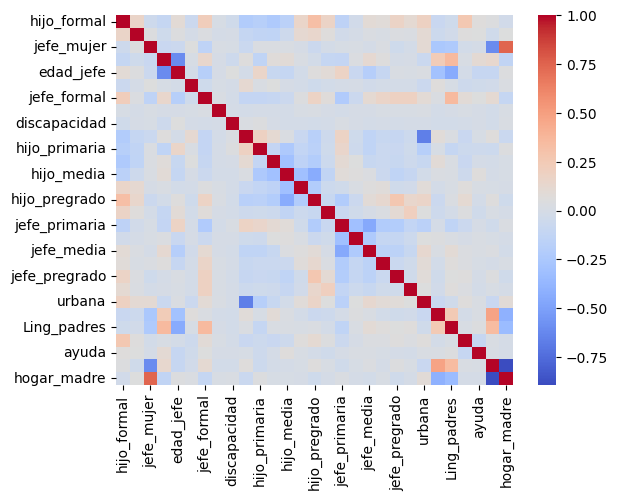

In [ ]:
# Visualicemos la matriz de correlación como una gráfica de calor
sns.heatmap(cor_matrix, cmap='coolwarm')
#sns.heatmap(cor_matrix, cmap='YlGnBu')
plt.show()

In [ ]:
# Encontrar las variables correlacionadas por 80%
correlated_vars = []
variables = cor_matrix.columns

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        if cor_matrix.iloc[i, j] > 0.8:
            correlated_vars.append((variables[i], variables[j]))

# Mostrar las variables correlacionadas
for var1, var2 in correlated_vars:
    print(f"{var1} y {var2} están correlacionadas (80%)")

In [ ]:
# Encontrar las variables correlacionadas por -80%
correlated_vars = []
variables = cor_matrix.columns

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        if cor_matrix.iloc[i, j] < -0.8:
            correlated_vars.append((variables[i], variables[j]))

# Mostrar las variables correlacionadas
for var1, var2 in correlated_vars:
    print(f"{var1} y {var2} están correlacionadas (-80%)")

hogar_nuclear y hogar_madre están correlacionadas (-80%)


**Dados los resultados de las correlaciones donde las variables 'hogar_nuclear' y 'hogar_madre' están correlacionados en más de un 80% (de manera negativa), se decide escoger solo una de ellas.**

In [ ]:
variables_cov_nuevas = ['hijo_formal','hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe', 'hijo_raza', 'jefe_formal', 'lgbt', 'discapacidad', 'campesino',         
         'hijo_primaria', 'hijo_secundaria', 'hijo_media', 'hijo_tecnica', 'hijo_pregrado', 'hijo_posgrado',
         'jefe_primaria', 'jefe_secundaria', 'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado', 
         'urbana', 'miembros', 'Ling_padres', 'internet', 'ayuda', 'hogar_nuclear']

In [ ]:
muestra_cov = muestra[variables_cov_nuevas]

In [ ]:
cov_matrix = muestra_cov.cov()

In [ ]:
#Volvemos a calcular el numero de condición de la matriz de covarianza directamente
cond_number = np.linalg.cond(cov_matrix)
print(cond_number) 

93803.664130539


**El número de condición mejora con la eliminación de la variable 'hogar_madre'.**

## 04. Evaluación de Modelos


### 04.1. Variables

In [ ]:
# Matriz de datos
var_x = ['hijo_mujer', 'jefe_mujer', 'hijo_joven', 'edad_jefe', 'hijo_raza', 'jefe_formal', 'lgbt', 'discapacidad', 'campesino',         
         'hijo_primaria', 'hijo_secundaria', 'hijo_media', 'hijo_tecnica', 'hijo_pregrado', 'hijo_posgrado',
         'jefe_primaria', 'jefe_secundaria', 'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado', 
         'urbana', 'miembros', 'Ling_padres', 'internet', 'ayuda', 'hogar_nuclear', 'antioquia', 'atlantico', 
         'bogota', 'bolivar', 'boyaca', 'caldas', 'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'choco', 'huila',
         'guajira', 'magdalena', 'meta', 'narino', 'norte', 'quindio', 'risaralda', 'santander', 'sucre', 'tolima', 'valle']

In [ ]:
# Etiqueta que queremos predecir
var_y = ['hijo_formal']

In [ ]:
pesos = ['fex_c18_gen'] 

In [ ]:
X = muestra[var_x]

In [ ]:
Y = muestra[var_y]

In [ ]:
W = muestra[pesos]

In [ ]:
Y.groupby('hijo_formal')['hijo_formal'].count()

hijo_formal
0    17954
1     9858
Name: hijo_formal, dtype: int64

In [ ]:
Y.groupby('hijo_formal')['hijo_formal'].count()/Y.shape[0]

hijo_formal
0    0.645549
1    0.354451
Name: hijo_formal, dtype: float64

### 04.2. Modelo probabilístico

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
X_test  = sm.add_constant(X_test, prepend=True)

In [ ]:
probit = sm.Probit(endog = y_train, exog = X_train)
modelo_probit = probit.fit()
print(modelo_probit.summary())

Optimization terminated successfully.
         Current function value: 0.448931
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:            hijo_formal   No. Observations:                22249
Model:                         Probit   Df Residuals:                    22197
Method:                           MLE   Df Model:                           51
Date:                Wed, 07 Jun 2023   Pseudo R-squ.:                  0.3103
Time:                        19:03:44   Log-Likelihood:                -9988.3
converged:                       True   LL-Null:                       -14483.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.7410      0.286     -9.594      0.000      -3.301      -2.181
hijo_mujer    

In [ ]:
# Prediccion
# ==============================================================================
predicciones_probit = modelo_probit.predict(exog = X_test)
clasificacion_probit = np.where(predicciones_probit < 0.5, 0, 1)
accuracy_probit = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion_probit,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy_probit}%")


El accuracy de test es: 77.76379651267303%


In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, clasificacion_probit)
cm

array([[3114,  506],
       [ 731, 1212]])

### 04.3. Modelo logístico 

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
logit = sm.Logit(endog = y_train, exog = X_train)
modelo_logit = logit.fit()
print(modelo_logit.summary())

Optimization terminated successfully.
         Current function value: 0.449161
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            hijo_formal   No. Observations:                22249
Model:                          Logit   Df Residuals:                    22197
Method:                           MLE   Df Model:                           51
Date:                Wed, 07 Jun 2023   Pseudo R-squ.:                  0.3100
Time:                        19:03:45   Log-Likelihood:                -9993.4
converged:                       True   LL-Null:                       -14483.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.1217      0.630     -8.132      0.000      -6.356      -3.887
hijo_mujer    

In [ ]:
# Prediccion
# ==============================================================================
predicciones_logit = modelo_logit.predict(exog = X_test)
clasificacion_logit = np.where(predicciones_logit < 0.5, 0, 1)
accuracy_logit = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion_logit,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy_logit}%")


El accuracy de test es: 77.76379651267303%


In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, clasificacion_logit)
cm

array([[3112,  508],
       [ 729, 1214]])

## 05. Modelo seleccionado

### 05.1 Modelo logit

In [ ]:
var_x = ['hijo_mujer', 'hijo_joven', 'edad_jefe', 'jefe_formal', 'lgbt', 'discapacidad', 'campesino',         
         'hijo_primaria', 'hijo_secundaria', 'hijo_media', 'hijo_tecnica', 'hijo_pregrado', 'hijo_posgrado',
         'jefe_primaria', 'jefe_secundaria', 'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado', 
         'urbana', 'miembros', 'Ling_padres', 'internet', 'ayuda', 'hogar_nuclear', 'antioquia', 'atlantico', 
         'bogota', 'bolivar', 'boyaca', 'caldas', 'caqueta', 'cauca', 'cesar', 'cordoba', 'cundinamarca', 'choco', 'huila',
         'guajira', 'magdalena', 'meta', 'narino', 'norte', 'quindio', 'risaralda', 'santander', 'sucre', 'tolima', 'valle']

In [ ]:
var_y = ['hijo_formal']

In [ ]:
X = muestra[var_x]

In [ ]:
Y = muestra[var_y]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
# Librerias
# ==============================================================================
from sklearn.linear_model import LogisticRegression

In [ ]:
# Con Scikit learn
# ==============================================================================
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_all = y_test.copy()

### 05.2 Prediccion

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
y_all['formal_pred'] = modelo.predict(X_test)

### 05.3 Precision

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))

Precisión del modelo: 77.89%


### 05.4 Matriz de confusión

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3128  492]
 [ 738 1205]]


In [ ]:
y_all.groupby(['hijo_formal','formal_pred'])['formal_pred'].count()

hijo_formal  formal_pred
0            0              3128
             1               492
1            0               738
             1              1205
Name: formal_pred, dtype: int64

### 05.5 Visualización del modelo - Gráfica

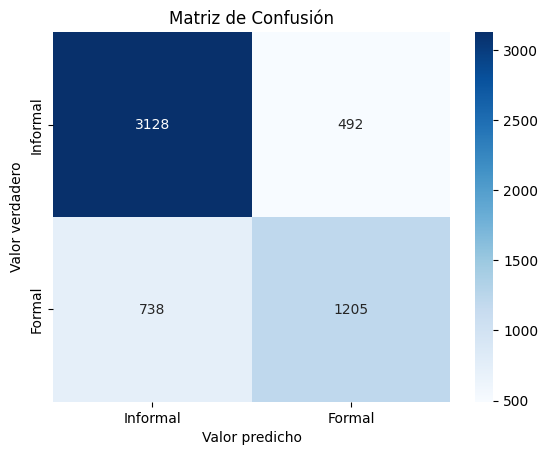

In [ ]:
# Títulos
class_labels = ['Informal', 'Formal']

# Mapa de calor
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Etiquetas 
ax.set_xlabel('Valor predicho')
ax.set_ylabel('Valor verdadero')

# Título del gráfico
ax.set_title('Matriz de Confusión')

ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

### 05.6 Recall

In [ ]:
recall = recall_score(y_test, y_pred)
print('Recall del modelo: {:.2f}%'.format(recall * 100))

Recall del modelo: 62.02%


### 05.7 Almacenar en zona Gold los resultados del modelo seleccionado

In [ ]:
# almacenar resultados del modelo
y_all['accuracy'] = accuracy
y_all['recall'] = recall

In [ ]:
# Llevar pandas a DataFrame para almacenar datos en S3
df_spResultado =spark.createDataFrame(y_all)

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


In [ ]:
# Almacenar resultados en zona Gold en S3
df_spResultado.write.mode("overwrite").csv("s3a://integrador-grupo2/Gold/ConsolidadoFinal/Yall.csv")

### 05.8 Pruebas

#### 05.9 Regularización

In [ ]:
# Acompañando los resultados presentados anteriormente se realiza una prueba de regularización
# con el objetivo de eliminar el overfiting y robustecer los resultados.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

# Crear una instancia del clasificador de regresión logística con regularización L1
model_L1 = LogisticRegression(penalty='l1', solver='liblinear')

# Ajustar el modelo a los datos de entrenamiento
model_L1.fit(X_train, y_train)

# Crear una instancia del clasificador de regresión logística con regularización L2
model_L2 = LogisticRegression(penalty='l2')

# Ajustar el modelo a los datos de entrenamiento
model_L2.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_L1 = model_L1.predict(X_test)
y_pred_L2 = model_L2.predict(X_test)

# Calcular la precisión de cada modelo
accuracy_L1 = accuracy_score(y_test, y_pred_L1)
accuracy_L2 = accuracy_score(y_test, y_pred_L2)

print(f"Precisión del modelo con regularización L1: {accuracy_L1*100}")
print(f"Precisión del modelo con regularización L2: {accuracy_L2*100}")

# Calcular el recall de cada modelo 
recall_L1 = recall_score(y_test, y_pred_L1)
recall_L2 = recall_score(y_test, y_pred_L2)

print(f"Recall del modelo con regularización L1: {recall_L1*100}")
print(f"Recall del modelo con regularización L2: {recall_L2*100}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión del modelo con regularización L1: 77.9435556354485
Precisión del modelo con regularización L2: 77.88962789861586
Recall del modelo con regularización L1: 62.738033968090576
Recall del modelo con regularización L2: 62.0174987133299


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El resultado nos indica que para los resultados son robustos dada la cercania con el resultado en la precisión del modelo.

## 06. Generar datos para visualización

In [ ]:
# Preparación de datos para ser presentados en tablero PowerBI
columnas = muestra.columns.tolist()
print(columnas)

['directorio_gen', 'secuencia_p_gen', 'orden_gen', 'mes_gen', 'p3271_gen', 'p6040_gen', 'p6050_gen', 'p6080_gen', 'p6090_gen', 'p7020_ocu', 'p6100_gen', 'p3042_gen', 'clase_gen', 'dpto_gen', 'fex_c18_gen', 'p9440_ocu', 'p6920_ocu', 'oci_ocu', 'inglabo_ocu', 'p6915_ocu', 'p6426_ocu', 'p7170s1_ocu', 'p515_ocu', 'p3363_ocu', 'lgbt_numerica_gen', 'discapacidad_gen', 'dificultad_gen', 'campesina_gen', 'aux_hijo', 'hijo', 'aux_oci', 'hijo_oci', 'aux_primer', 'primer', 'aux_jefe_hom', 'aux_jefe_muj', 'jefe_hombre', 'jefe_mujer', 'hijo_hombre', 'hijo_mujer', 'aux_edad_jefe', 'edad_jefe', 'edad_hijo', 'hijo_joven', 'aux_jefe_ninguno', 'aux_jefe_primaria', 'aux_jefe_secundaria', 'aux_jefe_media', 'aux_jefe_tecnica', 'aux_jefe_pregrado', 'aux_jefe_posgrado', 'jefe_ninguno', 'jefe_primaria', 'jefe_secundaria', 'jefe_media', 'jefe_tecnica', 'jefe_pregrado', 'jefe_posgrado', 'hijo_ninguno', 'hijo_primaria', 'hijo_secundaria', 'hijo_media', 'hijo_tecnica', 'hijo_pregrado', 'hijo_posgrado', 'aux_jefe_

In [ ]:
var_pbi = ['directorio_gen', 'mes_gen', 'inglabo_ocu', 'primer', 'edad_jefe', 'edad_hijo', 'hijo_joven', 'jefe_raza', 'hijo_raza', 'miembros', 'ing_padres',
           'internet', 'ayuda', 'lgbt', 'discapacidad', 'campesino',]

In [ ]:
# Para visualizar en Power BI
pbi= muestra[var_pbi]

In [ ]:
pbi['mes_gen'] = pbi['mes_gen'].astype(int)
pbi['edad_hijo'] = pbi['edad_hijo'].astype(int)

<ipython-input-302-0854c14d7228>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['mes_gen'] = pbi['mes_gen'].astype(int)
<ipython-input-302-0854c14d7228>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['edad_hijo'] = pbi['edad_hijo'].astype(int)


In [ ]:
# Sexo
pbi['hijo_sexo_a'] = np.where(muestra['hijo_mujer'] == 1, "Femenino", "Masculino")
pbi['jefe_sexo_a'] = np.where(muestra['jefe_mujer'] == 1, "Femenino", "Masculino")

<ipython-input-303-ef93106d357d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['hijo_sexo_a'] = np.where(muestra['hijo_mujer'] == 1, "Femenino", "Masculino")
<ipython-input-303-ef93106d357d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['jefe_sexo_a'] = np.where(muestra['jefe_mujer'] == 1, "Femenino", "Masculino")


In [ ]:
# Educación
pbi['hijo_edu_a'] = np.where(muestra['hijo_ninguno']    == 1, "Ninguno", "Primaria")
pbi['hijo_edu_a'] = np.where(muestra['hijo_secundaria'] == 1, "Secundaria", pbi['hijo_edu_a'])
pbi['hijo_edu_a'] = np.where(muestra['hijo_media']      == 1, "Media", pbi['hijo_edu_a'])
pbi['hijo_edu_a'] = np.where(muestra['hijo_tecnica']    == 1, "Técnica", pbi['hijo_edu_a'])
pbi['hijo_edu_a'] = np.where(muestra['hijo_pregrado']   == 1, "Pregrado", pbi['hijo_edu_a'])
pbi['hijo_edu_a'] = np.where(muestra['hijo_posgrado']   == 1, "Posgrado", pbi['hijo_edu_a'])

<ipython-input-304-9bd6bb1079c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['hijo_edu_a'] = np.where(muestra['hijo_ninguno']    == 1, "Ninguno", "Primaria")
<ipython-input-304-9bd6bb1079c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['hijo_edu_a'] = np.where(muestra['hijo_secundaria'] == 1, "Secundaria", pbi['hijo_edu_a'])
<ipython-input-304-9bd6bb1079c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
pbi['jefe_edu_a'] = np.where(muestra['jefe_ninguno']    == 1, "Ninguno", "Primaria")
pbi['jefe_edu_a'] = np.where(muestra['jefe_secundaria'] == 1, "Secundaria", pbi['jefe_edu_a'])
pbi['jefe_edu_a'] = np.where(muestra['jefe_media']      == 1, "Media", pbi['jefe_edu_a'])
pbi['jefe_edu_a'] = np.where(muestra['jefe_tecnica']    == 1, "Técnica", pbi['jefe_edu_a'])
pbi['jefe_edu_a'] = np.where(muestra['jefe_pregrado']   == 1, "Pregrado", pbi['jefe_edu_a'])
pbi['jefe_edu_a'] = np.where(muestra['jefe_posgrado']   == 1, "Posgrado", pbi['jefe_edu_a'])

<ipython-input-305-599ceff26b6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['jefe_edu_a'] = np.where(muestra['jefe_ninguno']    == 1, "Ninguno", "Primaria")
<ipython-input-305-599ceff26b6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['jefe_edu_a'] = np.where(muestra['jefe_secundaria'] == 1, "Secundaria", pbi['jefe_edu_a'])
<ipython-input-305-599ceff26b6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
# Formalización
pbi['hijo_for_a'] = np.where(muestra['hijo_formal'] == 1, "Formal", "Informal")
pbi['jefe_for_a'] = np.where(muestra['jefe_formal'] == 1, "Formal", "Informal")

<ipython-input-306-380a8ab15fe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['hijo_for_a'] = np.where(muestra['hijo_formal'] == 1, "Formal", "Informal")
<ipython-input-306-380a8ab15fe0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['jefe_for_a'] = np.where(muestra['jefe_formal'] == 1, "Formal", "Informal")


In [ ]:
# Zona
pbi['zona_a'] = np.where(muestra['urbana'] == 1, "Urbana", "Rural")

<ipython-input-307-fa1336598837>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['zona_a'] = np.where(muestra['urbana'] == 1, "Urbana", "Rural")


In [ ]:
# Hogar
pbi['hogar_a'] = np.where(muestra['hogar_padre'] == 1, "Hogar monoparental padre", "Hogar monoparental madre")
pbi['hogar_a'] = np.where(muestra['hogar_nuclear'] == 1, "Hogar nuclear", pbi['hogar_a'])

<ipython-input-308-1b97b07a1abc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['hogar_a'] = np.where(muestra['hogar_padre'] == 1, "Hogar monoparental padre", "Hogar monoparental madre")
<ipython-input-308-1b97b07a1abc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['hogar_a'] = np.where(muestra['hogar_nuclear'] == 1, "Hogar nuclear", pbi['hogar_a'])


In [ ]:
# Departamento
ref_dpto = {5: 'Antioquia', 8: 'Atlántico', 11: 'Bogotá', 13: 'Bolívar', 15: 'Boyacá', 17: 'Caldas', 18: 'Caquetá', 19: 'Cauca', 20: 'Cesar',
            23: 'Córdoba', 25: 'Cundinamarca', 27: 'Chocó', 41: 'Huila', 44: 'La guajira', 47: 'Magdalena', 50: 'Meta', 52: 'Nariño', 54: 'Norte de santander',
            63: 'Quindio', 66: 'Risaralda', 68: 'Santander', 70: 'Sucre', 73: 'Tolima', 76: 'Valle del cauca'}

In [ ]:
pbi['dpto_a'] = muestra['dpto_gen'].copy()

<ipython-input-310-bd7c70e98bd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['dpto_a'] = muestra['dpto_gen'].copy()


In [ ]:
pbi['dpto_a'] = pbi['dpto_a'].map(ref_dpto)

<ipython-input-311-70733378a7e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi['dpto_a'] = pbi['dpto_a'].map(ref_dpto)


In [ ]:
# Debido a que no se logró exponer un usuario desde Athena para consumo directo desde PowerBI, se descarga archivo csv para fuente de tablero PowerBI
# Guardar en gold
# pbi.to_csv(path_gold + 'pbi.csv', index=False)


In [ ]:
df_spResultadoFinal =spark.createDataFrame(pbi)

# Almacenar resultados finales para presentar en zona Gold en S3
df_spResultadoFinal.write.mode("overwrite").csv("s3a://integrador-grupo2/Gold/ConsolidadoFinal/ResultadoFinal.csv")

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


## 07. Otros Paths (sin uso)

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

In [ ]:
# path_bronze ='/content/gdrive/MyDrive/MCDA/2023-1/Proyecto integrador/02. Datos/01. Bronze/'
# path_silver ='/content/gdrive/MyDrive/MCDA/2023-1/Proyecto integrador/02. Datos/02. Silver/'
# path_gold   ='/content/gdrive/MyDrive/MCDA/2023-1/Proyecto integrador/02. Datos/03. Gold/'

#### Conexión Google Drive (sin uso)


## 08. Otros Dataset sin S3 (sin uso)

In [ ]:
# # Convirtiendo en dataframe cada archivo de cada mes de los respectivos modulos
# # ============================================================================== 
# archivos = ['Características generales, seguridad social en salud y educación.csv', 'Ocupados.csv']
# anio = []

# # Iterando 
# for i in range(1,13):
#   print(f'mes: {i}')
#   dfs = []
#   path_mes = f'{path_bronze}{i:02}/'

#   # Creando dataframes para cada uno de los archivos
#   if i == 1:
#     for filename in os.listdir(path_mes):
#         if filename.lower() in [a.lower() for a in archivos]: 
#             df = pd.read_csv(os.path.join(path_mes, filename), sep=',', header=0, encoding='ISO-8859-1')
#             dfs.append(df)
#             #print(len(dfs))

#   else: 
#     for filename in os.listdir(path_mes):
#         if filename.lower() in [a.lower() for a in archivos]: 
#             df = pd.read_csv(os.path.join(path_mes, filename), sep=';', header=0, encoding='ISO-8859-1')
#             dfs.append(df)
#             #print(len(dfs))

#   # Unificando los archivos para tener información de todo el mes
#   merged = dfs[0]
#   for i in range(1, len(dfs)):
#       merged = pd.merge(merged, dfs[i], on=['DIRECTORIO', 'SECUENCIA_P', 'ORDEN'], how='outer')
#   anio.append(merged)
#   print(len(anio))

In [ ]:
# # Unificando los meses para tener información de todo el anio
# # ==============================================================================
# geih_oci_2022 = anio[0]
# for i in range(1, len(anio)):
#     geih_oci_2022 = geih_oci_2022.append(anio[i])

In [ ]:
# # Informacion que tenemos de cada mes
# geih_oci_2022['MES'] = np.where(pd.isnull(geih_oci_2022['MES_x']), geih_oci_2022['MES_y'], geih_oci_2022['MES_x'])

In [ ]:
# geih_oci_2022.groupby('MES')[['DIRECTORIO']].count()

In [ ]:
# # Unificando algunas variables 
# geih_oci_2022['CLASE']   = np.where(pd.isnull(geih_oci_2022['CLASE_x']), geih_oci_2022['CLASE_y'], geih_oci_2022['CLASE_x'])
# geih_oci_2022['DPTO']    = np.where(pd.isnull(geih_oci_2022['DPTO_x']), geih_oci_2022['DPTO_y'], geih_oci_2022['DPTO_x'])
# geih_oci_2022['FEX_C18'] = np.where(pd.isnull(geih_oci_2022['FEX_C18_x']), geih_oci_2022['FEX_C18_y'], geih_oci_2022['FEX_C18_x'])

### Almacenar en gdrive

In [ ]:
# Guardar en gdrive
#geih_oci_2022.to_csv(path_bronze + 'geih_oci_2022.csv', index=False)